In [1]:
# Resources: 
# experiments/germline-model/chen-et-al-2022/compare-mchale-and-chen-windows.ipynb
# experiments/germline-model/chen-et-al-2022/null-distribution-is-normal.ipynb
# experiments/germline-model/chen-et-al-2022/QQ-plot-for-noncoding-windows.ipynb

In [4]:
import matplotlib.pyplot as plt 
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (12, 6)
})
plt.rc('font', family='arial')

# pip install pycairo

# uncomment to get better editable text boxes if saving files as pdfs and importing to illustrator
# import matplotlib
# matplotlib.use('cairo')

import matplotlib.font_manager as fm
font = fm.FontProperties(family = 'arial')
# e.g., 
# plt.title('Single Component', fontproperties = font)

## Non-exonic windows, with Gnocchi and various features (e.g. GC content), and enhancer-overlap status 

In [3]:
from get_windows import get_windows_with_GC_content_and_cpg_islands 

WINDOWS = get_windows_with_GC_content_and_cpg_islands()
WINDOWS 

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,GC_content_1000000bp,cpg_island_overlap,window_overlaps_cpg_island,N_mean_null_gnocchi
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.661339,0.641836,0.565094,0.577534,NaN,False,338.059552
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.556444,0.552845,0.572894,0.575506,NaN,False,302.590657
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.537463,0.561944,0.572564,0.575129,NaN,False,269.601925
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.532468,0.596740,0.570774,0.575225,NaN,False,270.583243
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.540460,0.568843,0.576514,0.574420,NaN,False,236.321790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019146,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.500499,0.542646,0.611944,0.568316,45.0,True,263.131293
1019147,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.552448,0.589941,0.613074,0.567839,NaN,False,272.046527
1019148,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.519481,0.585042,0.613494,0.567623,NaN,False,300.458958
1019149,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,3.636507,0.219258,2.281162,0.603397,0.639236,0.610484,0.567380,NaN,False,339.517045


## GC content, gBGC and BGS are correlated 


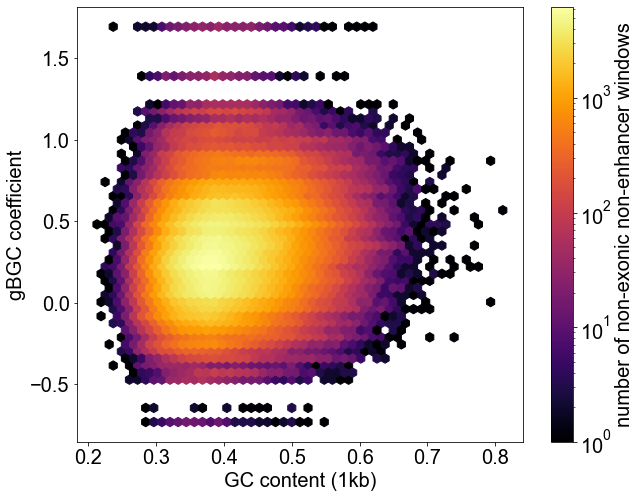

In [5]:
from matplotlib.colors import LogNorm

from util import length_to_string

def window_count_heat_map(df, x, y, xlabel, ylabel, min_windows=1):
  plt.figure(figsize=(10, 8))  

  plt.hexbin(
    df[x], 
    df[y], 
    gridsize=50, 
    norm=LogNorm(),  
    cmap='inferno',
    mincnt=min_windows  # Minimum number of windows required for a hexbin to be displayed
  )

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.colorbar(label='number of non-exonic non-enhancer windows')

GC_WINDOW_SIZE = 1000
window_count_heat_map(
  WINDOWS, 
  x=f'GC_content_{GC_WINDOW_SIZE}bp', 
  y='B_M1star.EUR', 
  xlabel=f'GC content ({length_to_string(GC_WINDOW_SIZE)})', 
  ylabel='gBGC coefficient'
)

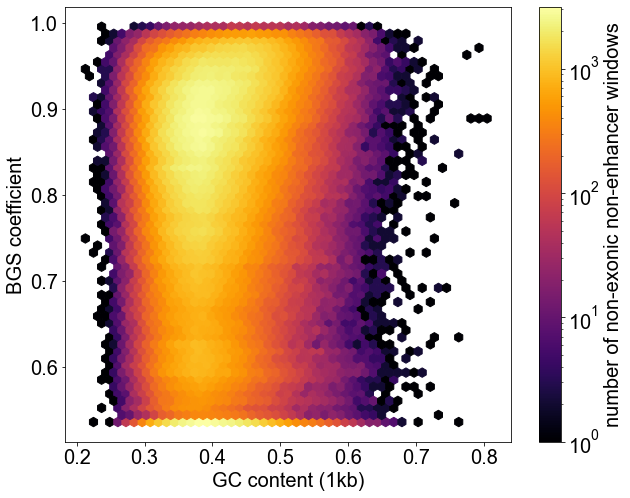

In [6]:
window_count_heat_map(
  WINDOWS, 
  x=f'GC_content_{GC_WINDOW_SIZE}bp', 
  y='B', 
  xlabel=f'GC content ({length_to_string(GC_WINDOW_SIZE)})', 
  ylabel='BGS coefficient'
)

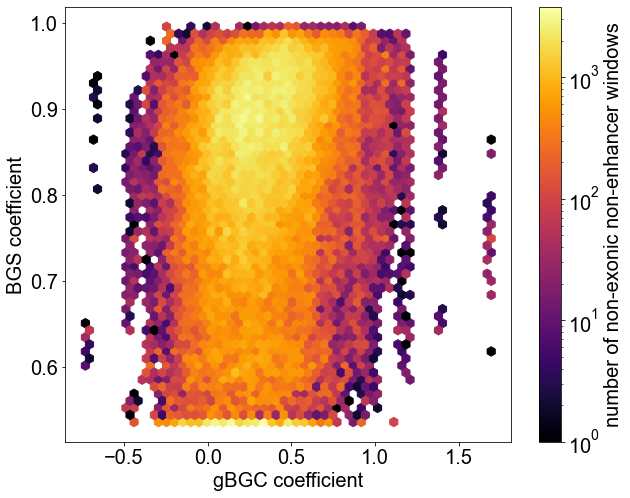

In [7]:
window_count_heat_map(
  WINDOWS, 
  x='B_M1star.EUR', 
  y='B', 
  xlabel='gBGC coefficient', 
  ylabel='BGS coefficient'
)

## Central Limit Theorem (CLT) predicts that z-scores should be standard-normal distributed

The number of distinct ALT alleles $N_i$ at a site $i$ is a categorical variable with site-dependent mean $\langle N_i \rangle$ and variance $\text{var} (N_i)$. (See [model](https://github.com/quinlan-lab/constraint-tools/blob/main/define-model/germline-model.ipynb).) Since these random variables are independent, but not identically distributed, the [Lyapunov CLT](https://en.wikipedia.org/wiki/Central_limit_theorem#Lyapunov_CLT) applies. This theorm states that, if the number of sites $l$ in a window is large enough (we consider $l=1000$), then $N = \sum_i N_i$ is distributed as: 

\begin{equation}
\frac{N - \langle N \rangle}{\sqrt{\text{var}(N)}} \sim \text{Normal}(0, 1) 
\end{equation}

where 

$$ 
\langle N \rangle = \sum_i \langle N_i \rangle 
$$ 

and 

$$ 
\text{var}(N) = \sum_i \text{var}(N_i).
$$


If one simulates many windows (e.g., with different sequence contexts), and then generates a single SNV count for each window so generated, then the distribution of z-scores of those windows will be a standard normal. 




## The distribution of Gnocchi is over-dispersed, and the over-dispersion correlates strongly with GC content, and, more weakly, with gBGC and BGS strength (when conditioning on GC content)

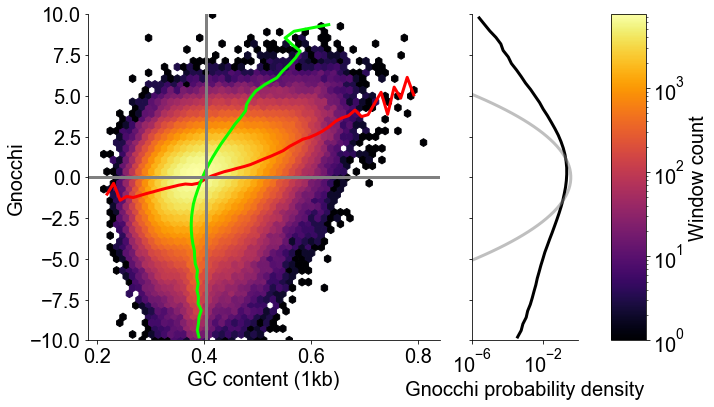

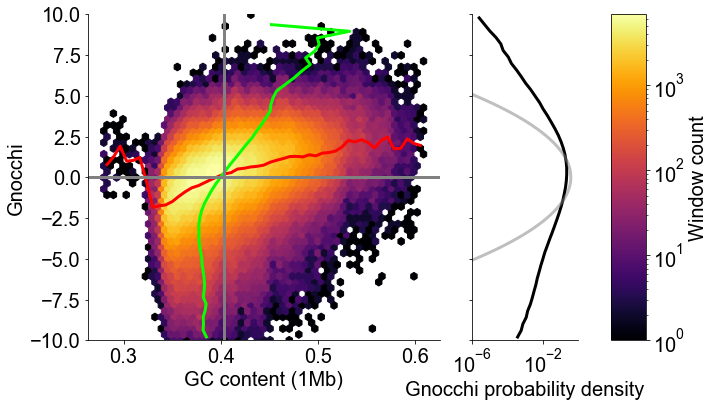

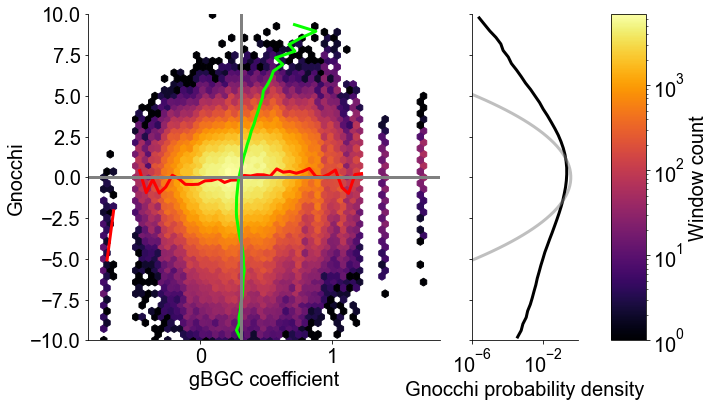

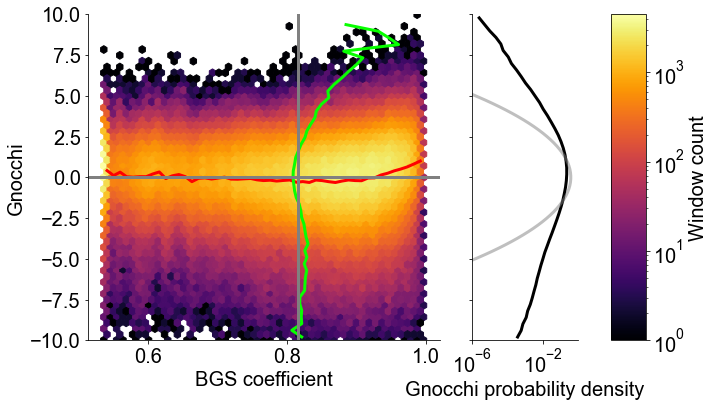

In [7]:
from scipy import stats
import numpy as np

def window_count_heat_map_gnocchi(df, x, xlabel, filename=None, cmap='inferno', min_windows=1):
    # Create a new figure and a grid of subplots
    fig, (ax_joint, ax_marginal, ax_colorbar) = plt.subplots(1, 3, figsize=(10, 6), gridspec_kw={'width_ratios': [5, 1.5, 0.5]})

    # Make ax_marginal share its y-axis with ax_joint
    ax_joint.get_shared_y_axes().join(ax_joint, ax_marginal)

    for side in ['top', 'right']:
        ax_joint.spines[side].set_visible(False)
        ax_marginal.spines[side].set_visible(False)

    # set ylim on ax_joint 
    ax_joint.set_ylim(-10, 10)

    # Create the hexbin plot in the joint axes
    hb = ax_joint.hexbin(
        df[x], 
        df['gnocchi'], 
        gridsize=50, 
        cmap=cmap, 
        norm=LogNorm(),  # Apply LogNorm here
        mincnt=min_windows,
    )

    # compute the average gnocchi value for each bin of x 
    x_edges = np.linspace(df[x].min(), df[x].max(), 50)
    x_mids = (x_edges[:-1] + x_edges[1:]) / 2
    y_values = []
    for i in range(1, len(x_edges)):
        mask = (df[x] >= x_edges[i-1]) & (df[x] < x_edges[i])
        y_values.append(df.loc[mask, 'gnocchi'].mean())
    y_values = np.array(y_values)

    # Plot the average gnocchi value for each bin of x
    ax_joint.plot(x_mids, y_values, color='red', lw=3)

    # compute the average x value for each bin of gnocchi 
    y_edges = np.linspace(df['gnocchi'].min(), df['gnocchi'].max(), 50)
    y_mids = (y_edges[:-1] + y_edges[1:]) / 2
    x_values = []
    for i in range(1, len(y_edges)):
        mask = (df['gnocchi'] >= y_edges[i-1]) & (df['gnocchi'] < y_edges[i])
        x_values.append(df.loc[mask, x].mean())
    x_values = np.array(x_values)

    # Plot the average x value for each bin of gnocchi
    ax_joint.plot(x_values, y_mids, color=(8/255, 255/255, 0/255), lw=3)

    # draw a vertical line at the mean of x 
    ax_joint.axvline(df[x].mean(), color='grey', lw=3)

    # draw a horizontal line at y = 0 
    ax_joint.axhline(0, color='grey', lw=3)

    # Compute a histogram and normalize it to be a density
    x_values, y_edges = np.histogram(df['gnocchi'], bins=50, density=True)
    y_mids = 0.5*(y_edges[1:] + y_edges[:-1])

    # Plot the density as a line plot in the marginal y axes
    # Note: we don't want to plot as bars on a log axis ...
    # ... because the bars create wide invisible objects in the pdf ...
    # ... that only become apparent upon import to adobe illustrator
    ax_marginal.plot(x_values, y_mids, marker='', color='black', lw=3)

    # Remove the y-tick labels from the marginal histogram
    ax_marginal.tick_params(axis='y', which='both', labelleft=False)

    # Set the x-axis limits on the marginal y axes
    ax_marginal.set_xlim(1e-6, 1)  

    # Set the x-axis scale on the marginal y axes to log
    ax_marginal.set_xscale('log')

    ax_marginal.set_xlabel('Gnocchi probability density')

    # Plot a standard normal pdf on the marginal y axes
    y_values = np.linspace(df['gnocchi'].min(), df['gnocchi'].max(), 100)
    ax_marginal.plot(stats.norm.pdf(y_values), y_values, color='grey', alpha=0.5, lw=3)

    ax_joint.set_xlabel(xlabel)
    ax_joint.set_ylabel('Gnocchi')

    # Add a colorbar for the hexbin plot
    cbar = plt.colorbar(hb, cax=ax_colorbar)

    # Add a label to the colorbar
    cbar.set_label('Window count')

    if filename:
      fig.savefig(filename, dpi=300, bbox_inches='tight')

GC_WINDOW_SIZE = 1000
window_count_heat_map_gnocchi(
  WINDOWS, 
  x=f'GC_content_{GC_WINDOW_SIZE}bp', 
  xlabel=f'GC content ({length_to_string(GC_WINDOW_SIZE)})', 
)

GC_WINDOW_SIZE = 1000000
window_count_heat_map_gnocchi(
  WINDOWS, 
  x=f'GC_content_{GC_WINDOW_SIZE}bp', 
  xlabel=f'GC content ({length_to_string(GC_WINDOW_SIZE)})', 
)

window_count_heat_map_gnocchi(
  WINDOWS, 
  x='B_M1star.EUR',
  xlabel='gBGC coefficient'
)

window_count_heat_map_gnocchi(
  WINDOWS, 
  x='B',
  xlabel='BGS coefficient'
)

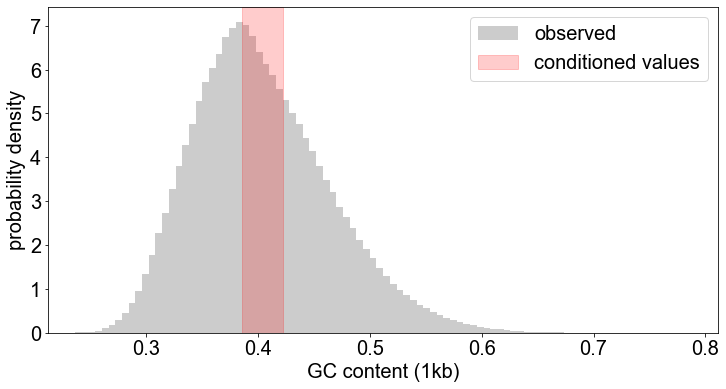

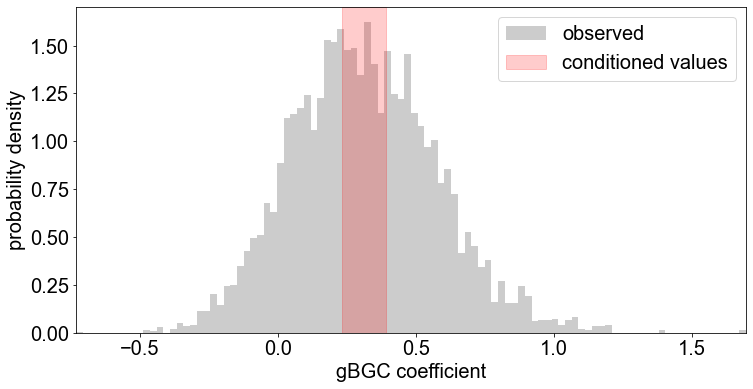

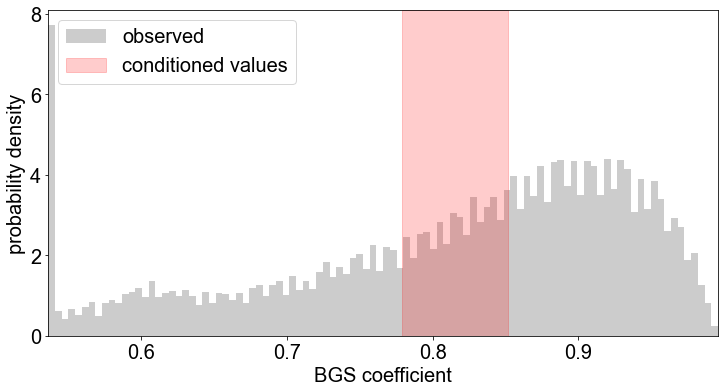

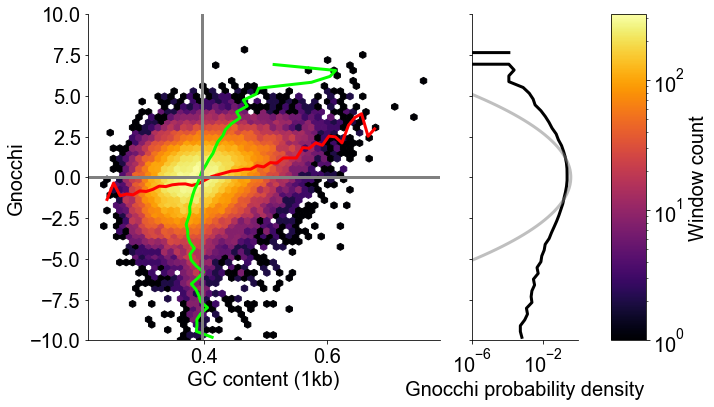

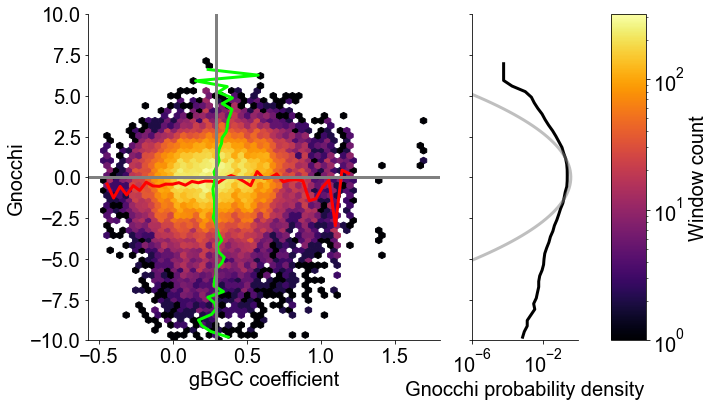

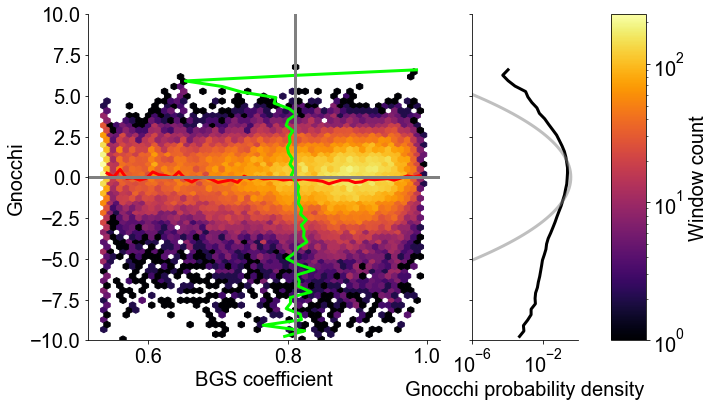

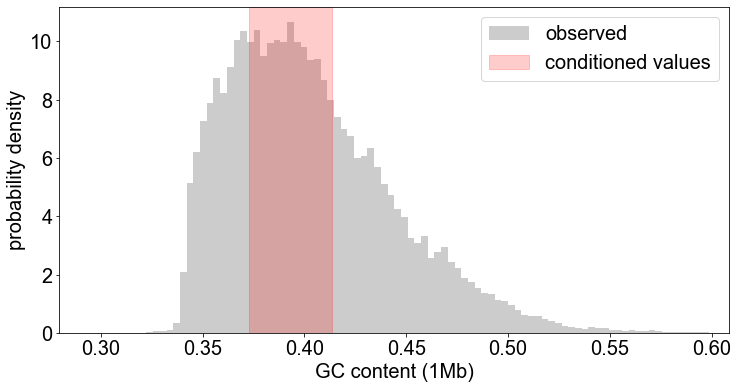

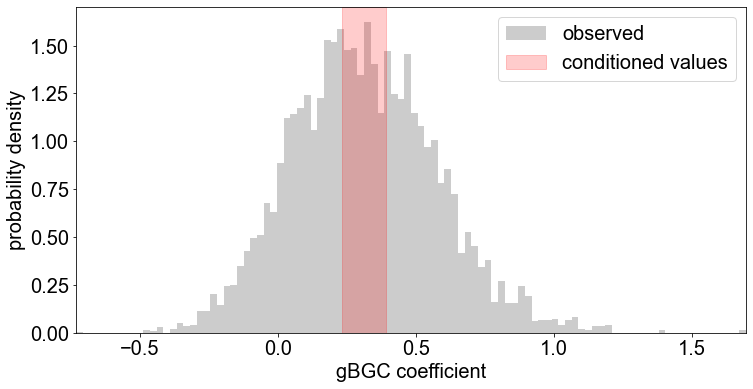

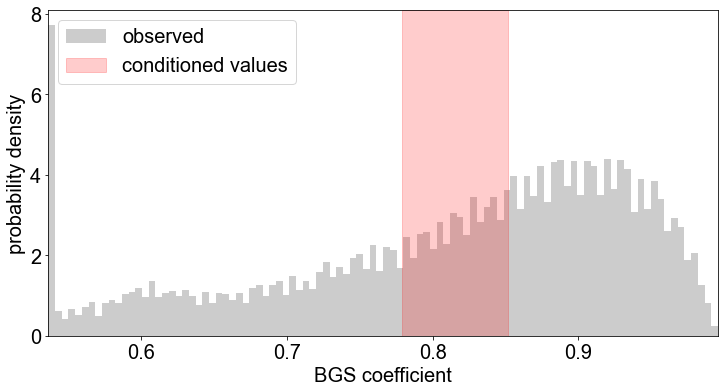

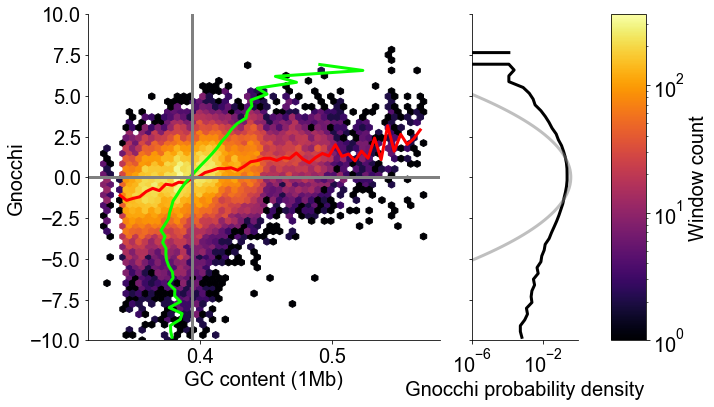

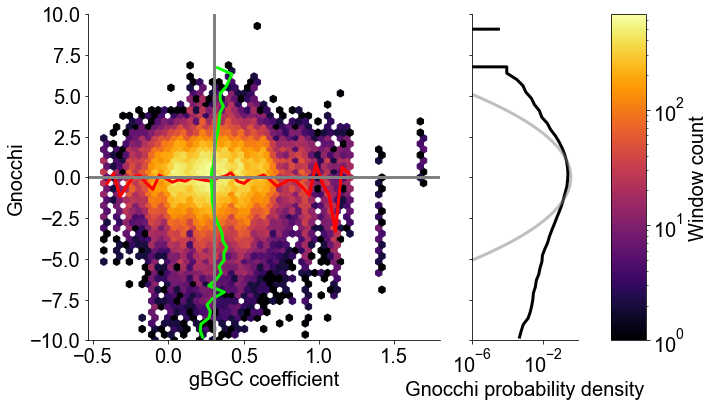

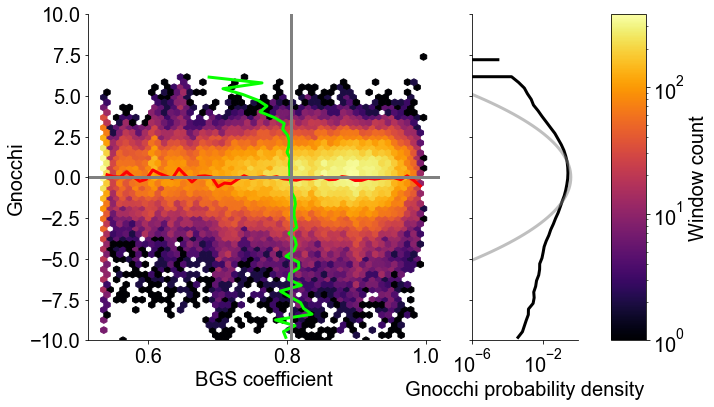

In [8]:
from util import (
  compute_limits, 
  slice_feature_space, 
  plot_feature_distribution
)

def get_mean_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 1
  elif gc_window_size == 1000000:
    return 0.975
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
                     
def get_std_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 0.3
  elif gc_window_size == 1000000:
    return 0.5
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')

def window_count_heat_map_gnocchi_all(df, gc_window_size, save_files=False):
  features_and_lims_and_labels = [
    (
      f'GC_content_{gc_window_size}bp', 
      compute_limits(
        df, 
        f'GC_content_{gc_window_size}bp', 
        mean_factor=get_mean_factor(gc_window_size), 
        std_factor=get_std_factor(gc_window_size)
      ), 
      f'GC content ({length_to_string(gc_window_size)})'
    ),
    (
      'B_M1star.EUR', 
      compute_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      'gBGC coefficient'
    ),
    (
      'B', 
      compute_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      'BGS coefficient'
    )
  ]

  for feature, lim, label in features_and_lims_and_labels:
    plot_feature_distribution(df, feature, xlabel=label, lim=lim)
    
  for feature, _, label in features_and_lims_and_labels:
    conditional_features_and_lims = [
      (f, l) for f, l, _ in features_and_lims_and_labels if f != feature
    ]
    df_sliced = slice_feature_space(df, conditional_features_and_lims)    
    window_count_heat_map_gnocchi(
      df_sliced, 
      x=feature, 
      xlabel=label, 
      filename=f'window-count-heat-map-gnocchi-all-{feature}.png' if save_files else None
    )

# plot heat maps as a function of one feature, conditioned upon the other two features
window_count_heat_map_gnocchi_all(WINDOWS, gc_window_size=1000, save_files=True)
window_count_heat_map_gnocchi_all(WINDOWS, gc_window_size=1000000)

## The GC-bias of the Chen model is weakly dependent on the length scale over which GC content is calculated

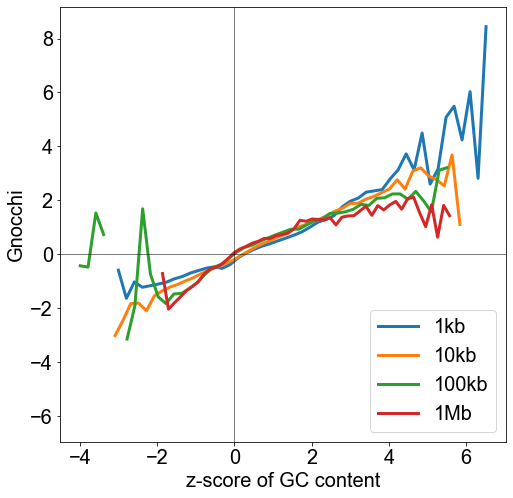

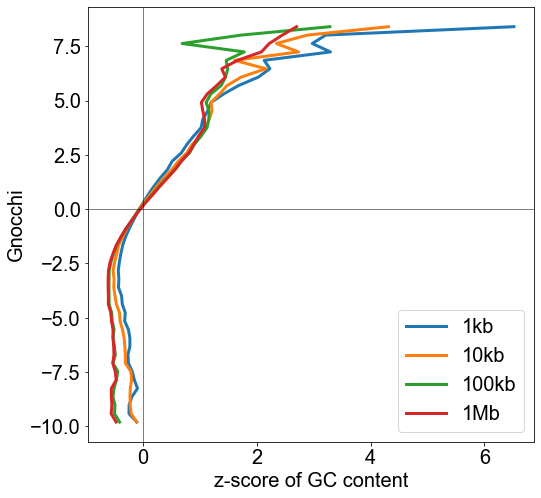

In [9]:
def plot_by_binning_y(x, y, ax, gc_window_size): 
    # compute the average x value for each bin of gnocchi 
    y_edges = np.linspace(y.min(), y.max(), 50)
    y_mids = (y_edges[:-1] + y_edges[1:]) / 2
    x_means = []
    for i in range(1, len(y_edges)):
        mask = (y >= y_edges[i-1]) & (y < y_edges[i])
        x_means.append(x[mask].mean())
    x_means = np.array(x_means)

    # Plot the average x value for each bin of gnocchi
    ax.plot(x_means, y_mids, lw=3, label=f'{length_to_string(gc_window_size)}')

def plot_by_binning_x(x, y, ax, gc_window_size):
    # compute the average gnocchi value for each bin of x 
    x_edges = np.linspace(x.min(), x.max(), 50)
    x_mids = (x_edges[:-1] + x_edges[1:]) / 2
    y_means = []
    for i in range(1, len(x_edges)):
        mask = (x >= x_edges[i-1]) & (x < x_edges[i])
        y_means.append(y[mask].mean())
    y_means = np.array(y_means)

    # Plot the average gnocchi value for each bin of x
    ax.plot(x_mids, y_means, lw=3, label=f'{length_to_string(gc_window_size)}')
   
def plot_gnocchi_vs_GC_content(df, plot_function): 
  fig, ax = plt.subplots(figsize=(8, 8))

  conditional_features_and_lims = [
    (
      'B_M1star.EUR', 
      compute_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=1
      )
    ),
    (
      'B', 
      compute_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=1
      )
    )
  ]

  df_sliced = slice_feature_space(df, conditional_features_and_lims)    

  for gc_window_size in [
    1000, 
    10000, 
    100000, 
    1000000
  ]: 
    x = df_sliced[f'GC_content_{gc_window_size}bp']
    y = df_sliced['gnocchi']

    x = (x - x.mean())/x.std()

    plot_function(x, y, ax, gc_window_size)

  ax.axhline(0, color='black', linewidth=0.5)
  ax.axvline(0, color='black', linewidth=0.5)        
  ax.legend(loc='lower right')
  ax.set_xlabel('z-score of GC content')
  ax.set_ylabel('Gnocchi')

  if plot_function == plot_by_binning_y:
    filename = 'gnocchi-vs-GC-content-by-binning-y.png'
  elif plot_function == plot_by_binning_x:
    filename = 'gnocchi-vs-GC-content-by-binning-x.png'
  else:
    raise ValueError(f'invalid plot function: {plot_function}')
  
  fig.savefig(filename, dpi=300, bbox_inches='tight')

plot_gnocchi_vs_GC_content(WINDOWS, plot_function=plot_by_binning_x)
plot_gnocchi_vs_GC_content(WINDOWS, plot_function=plot_by_binning_y) 

## p-values are massively inflated, and correlate strongly with GC content, and, more weakly, with gBGC and BGS

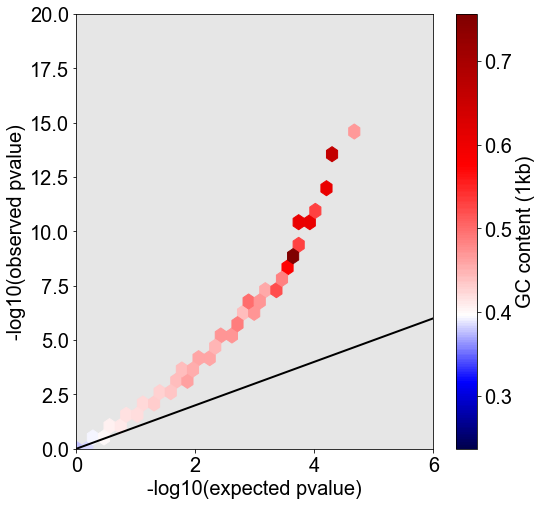

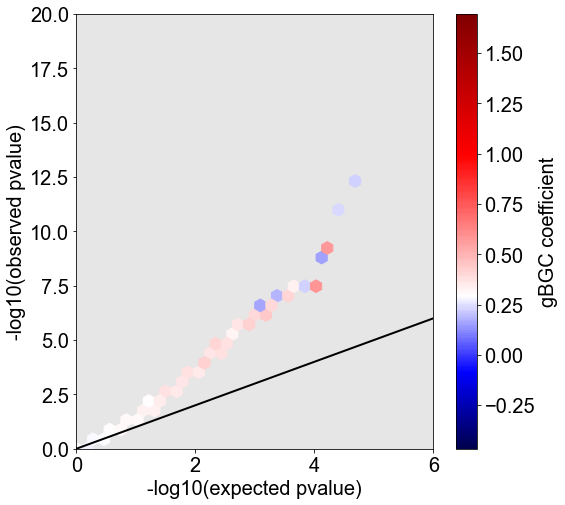

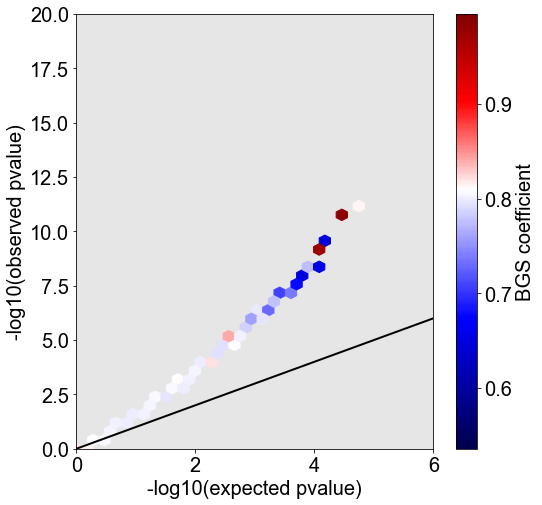

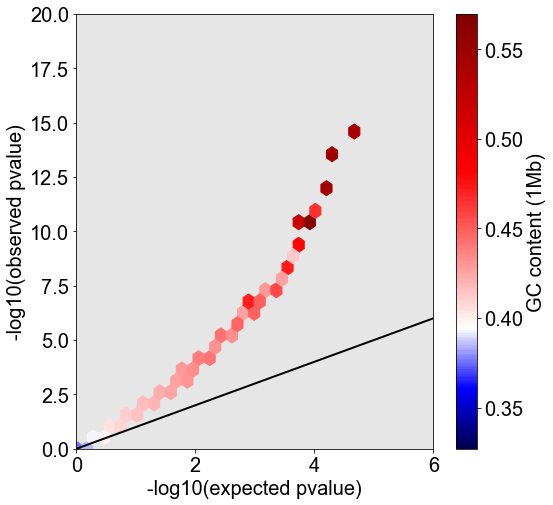

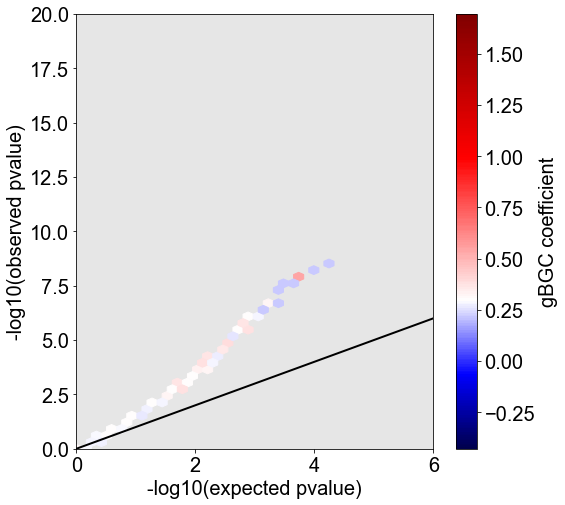

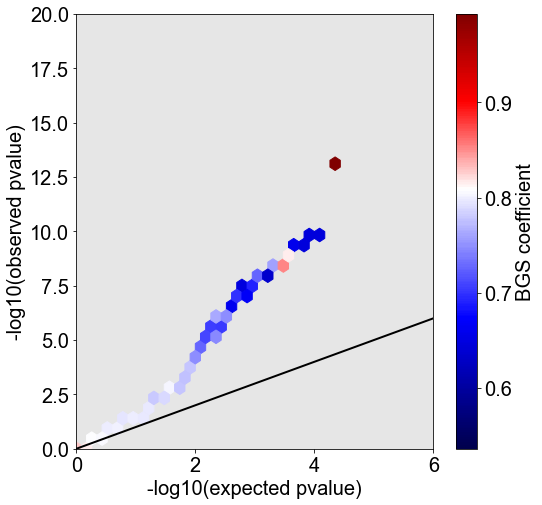

In [10]:
from matplotlib.colors import TwoSlopeNorm
import matplotlib.cm as cm

def get_mean_factor_for_pvalues(gc_window_size): 
  if gc_window_size == 1000: 
    return 1
  elif gc_window_size == 1000000:
    return 0.975
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
                     
def get_std_factor_for_pvalues(gc_window_size): 
  if gc_window_size == 1000: 
    return 0.3
  elif gc_window_size == 1000000:
    return 0.1
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')

def compute_sorted_pvalues_gnocchi(df, feature_str, tail='left'): 
    tuple_of_series = (
        df['N_observed'],
        df['N_mean_null_gnocchi'], 
        df[feature_str]
    )    
    N_observed, theta_mean, feature_values = tuple(np.array(ser) for ser in tuple_of_series)    
    theta_variance = theta_mean # assume Poisson 

    # use CLT to compute p-values: 
    if tail == 'left': 
        p_values = stats.norm.cdf(N_observed, loc=theta_mean, scale=np.sqrt(theta_variance))
    elif tail == 'right': 
        p_values = 1 - stats.norm.cdf(N_observed, loc=theta_mean, scale=np.sqrt(theta_variance))
    else: 
        raise ValueError(f'tail must be either "left" or "right" but got {tail}')

    # Get the indices that would sort p_values
    sort_indices = np.argsort(p_values)

    # Rearrange both p_values and feature
    p_values = p_values[sort_indices]
    feature_values = feature_values[sort_indices]

    return p_values, feature_values

def plot_order_statistics(df, gc_window_size, tail='left', xlim=[0, 6], ylim=[0, 20], save_files=False): 
  features_and_lims_and_labels = [
    (
      f'GC_content_{gc_window_size}bp', 
      compute_limits(
        df, 
        f'GC_content_{gc_window_size}bp', 
        mean_factor=get_mean_factor_for_pvalues(gc_window_size), 
        std_factor=get_std_factor_for_pvalues(gc_window_size)
      ), 
      f'GC content ({length_to_string(gc_window_size)})'
    ),
    (
      'B_M1star.EUR', 
      compute_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      'gBGC coefficient'
    ),
    (
      'B', 
      compute_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      'BGS coefficient'
    )
  ]

  for feature, _, label in features_and_lims_and_labels:
    conditional_features_and_lims = [
      (f, l) for f, l, _ in features_and_lims_and_labels if f != feature
    ]
    df_sliced = slice_feature_space(df, conditional_features_and_lims)    
    p_values, feature_values = compute_sorted_pvalues_gnocchi(df_sliced, feature, tail)

    # https://github.com/petermchale/QQ-plots/blob/master/qq-plots.pdf
    observed_order_statistics = p_values
    expected_order_statistics = [(i+1)/(len(p_values)+1) for i in range(len(p_values))]    

    # Create a diverging colormap
    cmap = cm.get_cmap('seismic')  # Use cm.get_cmap instead of plt.get_cmap
    divnorm = TwoSlopeNorm(vmin=np.nanmin(feature_values), vcenter=np.nanmean(feature_values), vmax=np.nanmax(feature_values))

    plt.figure(figsize=(8, 8))
    # Create a hexbin plot with bins colored by the mean value of feature
    hb = plt.hexbin(
        -np.log10(expected_order_statistics), 
        -np.log10(observed_order_statistics), 
        C=feature_values, 
        gridsize=25, 
        reduce_C_function=np.nanmean,
        cmap=cmap,
        norm=divnorm,
    )
    plt.gca().set_facecolor(3*[0.9])  # Set the background color of the axis to a lighter shade of grey
    plt.colorbar(hb, label=label)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(xlim, xlim, 'k-', linewidth=2)
    plt.xlabel('-log10(expected pvalue)')
    plt.ylabel('-log10(observed pvalue)')

    if save_files:      
      filename = f'order-statistics-{feature}.png'
      plt.savefig(filename, dpi=300, bbox_inches='tight')

plot_order_statistics(WINDOWS, gc_window_size=1000) 
plot_order_statistics(WINDOWS, gc_window_size=1000000, save_files=True) 